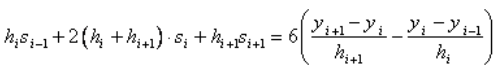

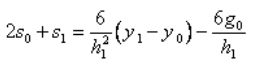

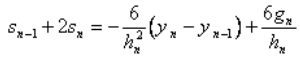



In [2]:
import matplotlib.pyplot as plt
import numpy as np

1) Показать, что задавая значения производных в концевых точках, получаем кубический сплайн, который проходит через произвольно расположенные точки.

In [114]:
n = 11
x = np.linspace(-1, 1, n)
y = np.random.random(n)

In [115]:
print(x, y)

[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ] [0.03896393 0.46233447 0.89947981 0.09407006 0.97394547 0.58928245
 0.53093524 0.12897952 0.92537126 0.30808384 0.79356981]


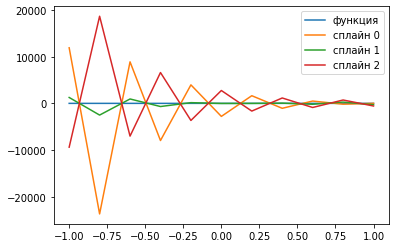

In [116]:
plt.plot(x, y, label='функция')
for i in range(3):
    g0 = 2 + 2*i
    gn = 2 - 2*i
    N = n - 1
    k1, k2 = -0.5, -0.5
    h = 0.1
    a, b, c = h, -4 * h, h
    m1 = 3 * (y[1] - y[0]) / h**2 - 3 * g0 / h
    m2 = -3 * (y[N] - y[N - 1]) / h**2 + 3 * gn / h
    v = [0 for j in range(N+1)]
    u = [0 for j in range(N+1)]
    s = [0 for j in range(N+1)]
    v[1] = k1
    u[1] = m1
    for j in range(2, N + 1):
        v[j] = b / (c - a * v[j - 1])
        f = -6 * ((y[j] - y[j - 1]) / h - (y[j - 1] - y[j - 2]) / h)
        u[j] = (f + a * u[j - 1]) / (c - a * v[j - 1])
    s[N] = (k2 * u[N] + m2) / (1 - k2 * v[N])
    for j in range(N, 0, -1):
        s[j - 1] = v[j] * s[j] + u[j]
    plt.plot(x, s, label='сплайн ' + str(i))
plt.legend()
plt.show()

2) Задайте равномерное разбиение отрезка [-1,1] и произвольные ординаты этих точек в диапазоне от 0 до 1. Постройте кубическую сплайн-интерполяцию такой функции. (Использовать квадратичные концы и естественный сплайн.)

In [118]:
n = 11
x = np.linspace(-1, 1, n)
y = np.random.random(n)

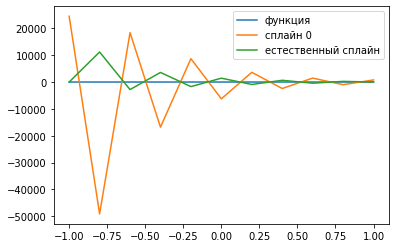

In [119]:
plt.plot(x_space, y, label='функция')
for i in range(2):
    g0 = 2 + 2*i
    gn = 2 - 2*i
    N = n - 1
    if i == 0:
        k1, k2 = -0.5, -0.5
        m1 = 3 * (y[1] - y[0]) / h**2 - 3 * g0 / h
        m2 = -3 * (y[N] - y[N - 1]) / h**2 + 3 * gn / h
    else:
        k1, k2 = 0, 0
        m1 = 0
        m2 = 0
    h = 0.1
    a, b, c = h, -4 * h, h
    v = [0 for j in range(N+1)]
    u = [0 for j in range(N+1)]
    s = [0 for j in range(N+1)]
    v[1] = k1
    u[1] = m1
    for j in range(2, N + 1):
        v[j] = b / (c - a * v[j - 1])
        f = -6 * ((y[j] - y[j - 1]) / h - (y[j - 1] - y[j - 2]) / h)
        u[j] = (f + a * u[j - 1]) / (c - a * v[j - 1])
    s[N] = (k2 * u[N] + m2) / (1 - k2 * v[N])
    for j in range(N, 0, -1):
        s[j - 1] = v[j] * s[j] + u[j]
    if i == 0:
        plt.plot(x, s, label='сплайн ' + str(i))
    else:
        plt.plot(x, s, label='естественный сплайн')
plt.legend()
plt.show()